# Business Understanding

## 1) Overview 
This project aims to develop a personalized movie recommendation system by leveraging a dataset containing movie information, user ratings, and interactions. The system will utilize content-based and collaborative filtering techniques to suggest movies to users based on their preferences and past interactions. 
 Modules for movie and user profiling will be developed to analyze movie attributes and user preferences, respectively. Evaluation and optimization will be conducted to enhance the accuracy
 Furthermore, leveraging movie metadata, user ratings, and collaborative filtering algorithms, the system provides personalized movie recommendations to enhance the user's movie-watching experience.


## 1.1)Introduction
- TMDB is a popular database that provides comprehensive information about movies,that contains the following titles, release dates, genres,cast and crew information. Credit information is given as well about the cast and crew information whereby the cast and crew are invoved in each movie. With the combination of the datasets, we gain valuable insights and perform variious analyses related to the movie industry

## 1.2) Problem Statement

- The movie industry is vast and fast evolving , with countless movies and movie sequels  released each year hence can be a challenge for the users to navigate through the vast amount of content and get to know which movies align with their preferences. 
- To ease this, or rather improve the users' experience, we come up withh a recommendation system that provides personalized movie recommendations based on user preferences and similarities with other users, and also aim to improve user satisfaction, increase user engagement, which ultimately drive user's retention on the platform.

## 1.3) Objectives

### 1.3.1) General  Objectives
- Develop a recommendation system that leverages user data and movie information to provide personalized movie recommendations.
Incorporate user preferences, including movie genres, ratings, and historical interactions, to generate relevant and engaging recommendations.
- Implement different recommendation techniques, such as collaborative filtering and content-based filtering, to ensure a diverse and accurate set of movie recommendations.
- To develop a movie recommendation system based on movie attributes, user ratings, and user interactions. The dataset consists of movie information such as title, cast, crew, budget, genres, keywords, language, revenue, and other relevant attributes. The objective is to leverage this data to build a recommendation system that can suggest movies to users based on their preferences and past interactions.

### 1.4 Data Understanding
 * Columns Understanding:

- id: Unique identifier for each movie
- title: Title of the movie
- cast: List of actors/actresses in the movie
- crew: List of crew members involved in the movie
- budget: Budget of the movie
- genres: List of genres associated with the movie
- homepage: Website URL of the movie
- keywords: List of keywords associated with the movie
- original_language: Original language of the movie
- original_title: Original title of the movie
- production_companies: List of production companies involved in the movie
- production_countries: List of countries where the movie was produced
- release_date: Release date of the movie
- revenue: Revenue generated by the movie
- runtime: Duration of the movie in minutes
- spoken_languages: List of languages spoken in the movie
- status: Current status of the movie (e.g., Released, Post Production)
- tagline: Tagline or slogan of the movie
- vote_average: Average vote rating for the movie
- vote_count: Number of votes received by the movie
- tags: List of tags associated with the movie

#### Import/ Load the libraries required

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import ast 
import json
from collections.abc import Iterable

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import PrecisionRecallDisplay, mean_squared_error, precision_recall_fscore_support, precision_recall_curve
from sklearn.pipeline import Pipeline

from wordcloud import WordCloud

from surprise import SVD, Reader, Dataset 
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV
from surprise import KNNWithMeans
from surprise import accuracy

from nltk import PorterStemmer

from my_functions import DatasetInfo, movie_score, get_user_recommendations, recommended_movies

import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='IPython')

### Load the Datasets 
 >- Movie Credits Dataset 

In [2]:
tmdb_movie_credits = pd.read_csv(r".data/tmdb_5000_credits.csv")
tmdb_movie_credits

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


>-Movies Dataset

In [3]:
tmdb_movies = pd.read_csv(r".data/tmdb_5000_movies.csv")
tmdb_movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

### Merge the Datasets
* To avoid overlapping of the tilte columns we drop because we already have the title in the movie dataset 

In [4]:
# Drop the Title column in Movies Dataset
tmdb_movies.drop(['title'], axis = 1, inplace = True )

In [5]:
# Identify the columns that are common and need to be merged 
tmdb_movie_credits.columns=['id', 'title', 'cast', 'crew']

In [6]:
movies_credits = pd.merge(tmdb_movie_credits, tmdb_movies, on = 'id')
movies_credits.head()

,id,title,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124


### Data Cleaning and Exploration

In this section, we create functions to explore the following characteristics of our dataset
- Info 
- Columns, Column Names
- Datatypes
- Statistcics 

In [7]:
data_info = DatasetInfo(movies_credits)
print(data_info)

In [8]:
data_info.check_dataset_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4803 non-null   int64  
 1   title                 4803 non-null   object 
 2   cast                  4803 non-null   object 
 3   crew                  4803 non-null   object 
 4   budget                4803 non-null   int64  
 5   genres                4803 non-null   object 
 6   homepage              1712 non-null   object 
 7   keywords              4803 non-null   object 
 8   original_language     4803 non-null   object 
 9   original_title        4803 non-null   object 
 10  overview              4800 non-null   object 
 11  popularity            4803 non-null   float64
 12  production_companies  4803 non-null   object 
 13  production_countries  4803 non-null   object 
 14  release_date          4802 non-null   object 
 15  revenue              

In [9]:
data_info.check_dataset_shape()

Dataset shape: (4803, 22)


In [10]:
data_info.get_dataset_statistics_describe()

,id,budget,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,57165.484281,2.904504e+07,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,88694.614033,4.072239e+07,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,5.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,9014.500000,7.900000e+05,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,14629.000000,1.500000e+07,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,58610.500000,4.000000e+07,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,459488.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [11]:
movies_credits.duplicated().sum()

0

In [12]:
movies_credits.isnull().sum()

id                         0
title                      0
cast                       0
crew                       0
budget                     0
genres                     0
homepage                3091
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
vote_average               0
vote_count                 0
dtype: int64

Some columns within our dataset contain a list of dictionaries. In the cells below, we apply the function from my_functions to extract the desired attribute from each element in the columns.

In [13]:
# For the genres column we have to convert it but first we have to implement 
movies_credits.iloc[0].genres


'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

Here we will apply the functions from our python file to clean the dataset columns

In [14]:
# Cleaning the genres column
movies_credits['genres']=movies_credits['genres'].apply(data_info.convert)

# Cleaning the keywords column
movies_credits['keywords']=movies_credits['keywords'].apply(data_info.get_keywords)

# Cleaning the production companies column
movies_credits['production_companies']=movies_credits['production_companies'].apply(data_info.convert)

# Cleaning the production countries column
movies_credits['production_countries'] = movies_credits['production_countries'].apply(data_info.convert)

# Cleaning the cast column
movies_credits['cast']=movies_credits['cast'].apply(data_info.convert3)

# Cleaning the crew column
movies_credits['crew']=movies_credits['crew'].apply(data_info.get_directors)

In the cell below, we split the text in the `overview` column into a list of words for each row where the value is a string. For rows where the value is not a string, it assigns `np.nan` to indicate a missing value.

In [15]:
movies_credits['overview'] = movies_credits['overview'].apply(lambda x: x.split() if isinstance(x, str) else np.nan)

In [16]:
movies_credits.head()

,id,title,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,"[culture clash, future, space war, space colon...",en,Avatar,...,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski],300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,...,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500
2,206647,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes],245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,...,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466
3,49026,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan],250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,...,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106
4,49529,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton],260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,"[based on novel, mars, medallion, space travel...",en,John Carter,...,[Walt Disney Pictures],[United States of America],2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124


The code below applies a lambda function to iterate over each element `i` (column value) in the input list `x` (column). It replaces any occurrence of whitespace (" ") in each element with an empty string, effectively removing any spaces.

In [17]:
# Remove spaces from the elements in the 'genres' column
movies_credits['genres'] = movies_credits['genres'].apply(lambda x: [i.replace(" ","") for i in x])

# Remove spaces from the elements in the 'keywords' column
movies_credits['keywords'] = movies_credits['keywords'].apply(lambda x: [i.replace(" ","") for i in x])

# Remove spaces from the elements in the 'crew' column
movies_credits['crew'] = movies_credits['crew'].apply(lambda x: [i.replace(" ","") for i in x])

# Remove spaces from the elements in the 'cast' column
movies_credits['cast'] = movies_credits['cast'].apply(lambda x: [i.replace(" ","") for i in x])

Concatenating the modified columns into one named `tags`

In [18]:
movies_credits['tags'] = movies_credits['overview'] + movies_credits['genres'] + movies_credits['keywords'] + movies_credits['cast'] + movies_credits['crew']

In [20]:
movies_credits['tags']

0       [In, the, 22nd, century,, a, paraplegic, Marin...
1       [Captain, Barbossa,, long, believed, to, be, d...
2       [A, cryptic, message, from, Bond’s, past, send...
3       [Following, the, death, of, District, Attorney...
4       [John, Carter, is, a, war-weary,, former, mili...
                              ...                        
4798    [El, Mariachi, just, wants, to, play, his, gui...
4799    [A, newlywed, couple's, honeymoon, is, upended...
4800    ["Signed,, Sealed,, Delivered", introduces, a,...
4801    [When, ambitious, New, York, attorney, Sam, is...
4802    [Ever, since, the, second, grade, when, he, fi...
Name: tags, Length: 4803, dtype: object

## 3) EDA:
## Visualization

I. **Univariate Analysis**

* Vote Count

count     4803.000000
mean       690.217989
std       1234.585891
min          0.000000
25%         54.000000
50%        235.000000
75%        737.000000
max      13752.000000
Name: vote_count, dtype: float64


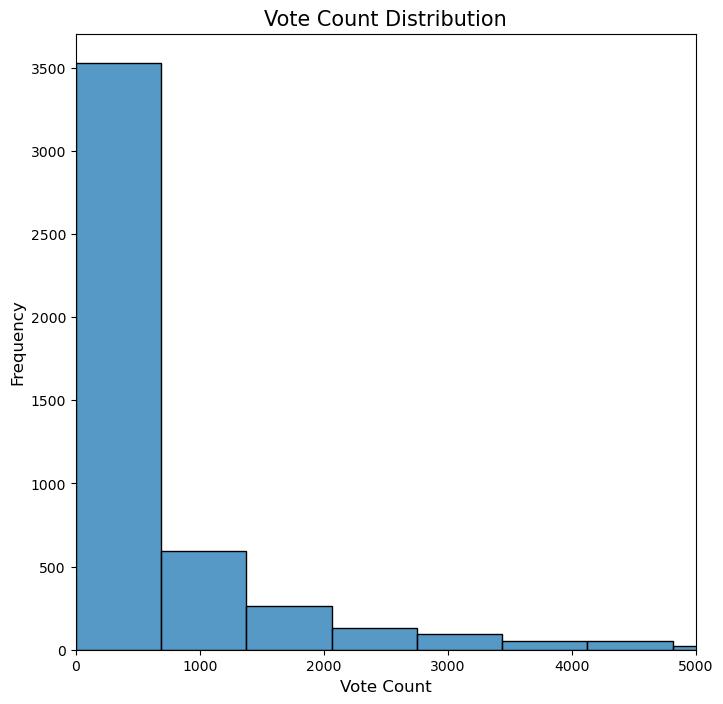

In [29]:
# Vote Count description
vote_count_univariate = movies_credits['vote_count'].describe()
print(vote_count_univariate)

# Plot vote count distribution
plt.figure(figsize=(8, 8))
sns.histplot(movies_credits['vote_count'], kde = False , bins = 20)
plt.xlabel("Vote Count", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim(0, 5000)
plt.title("Vote Count Distribution", fontsize=15)
plt.savefig(".data/images/vote_count_plot")
plt.show()

From the plot above we can determine that the vote count decreases hence a low concentarationtion for the vote counts 

* Vote Average

count    4803.000000
mean        6.092172
std         1.194612
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64


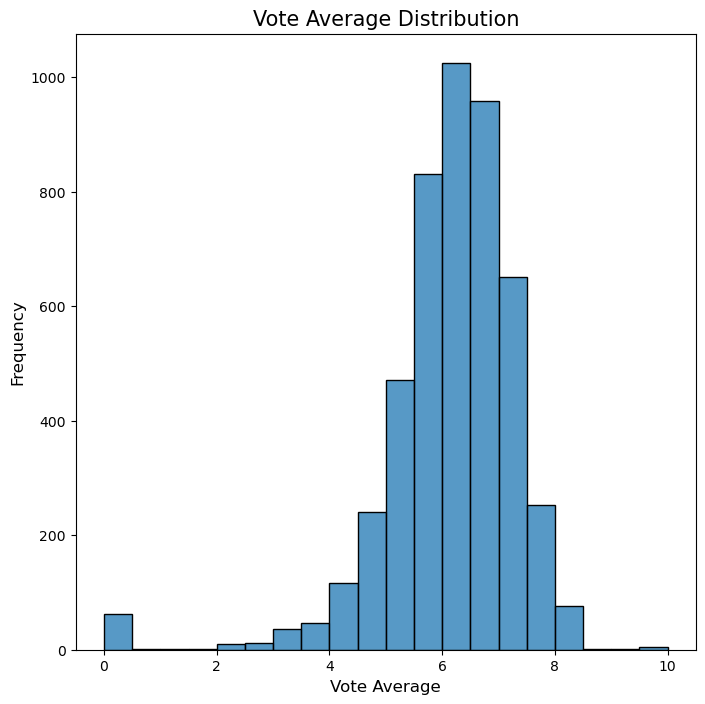

In [30]:
vote_average_univariate = movies_credits['vote_average'].describe()
print(vote_average_univariate)

# Plot the vote average distribution
plt.figure(figsize=(8, 8))
sns.histplot(movies_credits['vote_average'], kde = False , bins = 20)
plt.xlabel("Vote Average", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Vote Average Distribution", fontsize=15)
# save the figure
plt.savefig(".data/images/vote_average_plot")
# show the figure
plt.show()

The vote average is normallly distributed with the majority of it being 6-8. 

### Check for existence of outliers



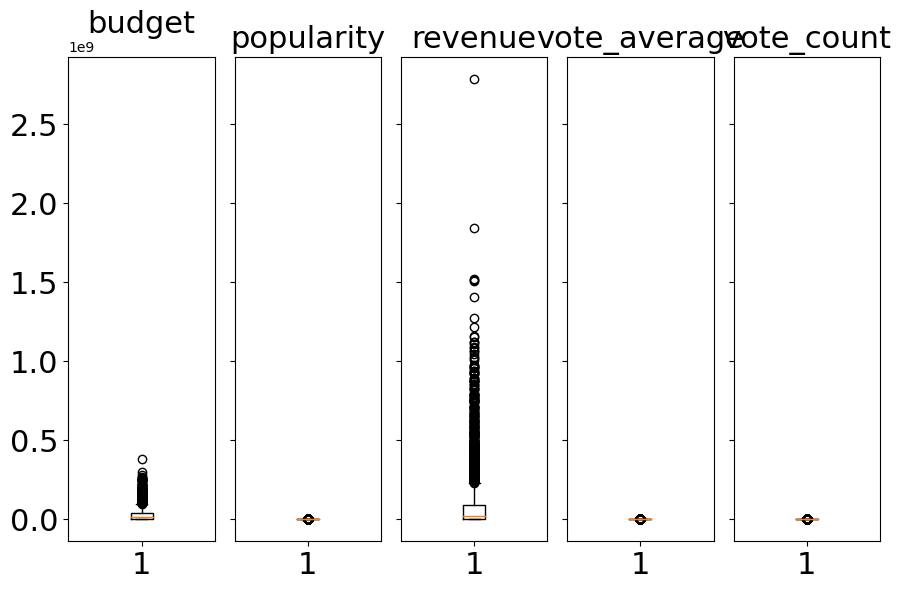

In [31]:
# Select the variables you want to plot

cols_to_plot = ['budget', 'popularity', 'revenue', 'vote_average', 'vote_count']

######## Create a subplot grid
fig, axes = plt.subplots(nrows=1, ncols=len(cols_to_plot), figsize=(9, 6), sharey=True)

####### Create a boxplot for each variable in a separate subplot
for i, col in enumerate(cols_to_plot):
    axes[i].boxplot(movies_credits[col])
    axes[i].set_title(col, fontsize=22)
    axes[i].tick_params(axis='both', which='major', labelsize=22)

# Adjust spacing between subplots
plt.tight_layout()
# save te figure
plt.savefig(".data/images/Outliers")
# Show the figure
plt.show()

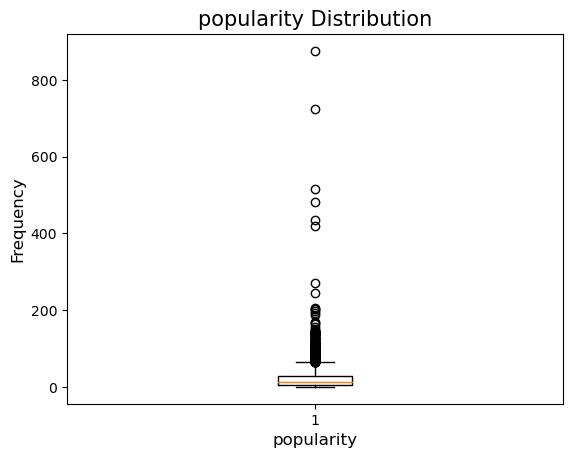

In [26]:
# Checking for outliers in the 'popularity' column
plt.boxplot(movies_credits['popularity'])
plt.xlabel("popularity", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("popularity Distribution", fontsize=15)
# save the figure
plt.savefig(".data/images/popularity_outliers_plot")
plt.show()

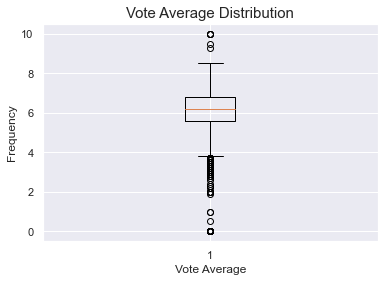

In [284]:
## Checking for outliers in the 'vote average' column
plt.boxplot(movies_credits['vote_average'])
plt.xlabel("Vote Average", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Vote Average Distribution", fontsize=15)
# save the figure
#plt.savefig(".data/images/vote_average_outliers_plot")
plt.show()

There are outliers from 0-4 and 8-10, hence we remove them 

In [285]:
movies_credits['popularity'].nlargest(10)

546    875.581305
95     724.247784
788    514.569956
94     481.098624
127    434.278564
28     418.708552
199    271.972889
82     243.791743
200    206.227151
88     203.734590
Name: popularity, dtype: float64

In [286]:
result = (movies_credits['popularity']  >= 200 ).value_counts()

movies_credits['popularity'].nsmallest(10)

4553    0.000000
3361    0.000372
4727    0.001117
4118    0.001186
4625    0.001389
4509    0.001586
4305    0.002386
4721    0.002388
4487    0.003142
4589    0.003352
Name: popularity, dtype: float64

In [287]:
# Define the lower and upper bounds for the outliers
lower_bound = 0
upper_bound = 400

# Remove outliers from the 'vote_average' column
movies_credits_filtered = movies_credits[(movies_credits['popularity'] >= lower_bound) & (movies_credits['popularity'] <= upper_bound)]

# Display the shape filtered dataset without outliers
movies_credits_filtered.shape

(4797, 23)

In [288]:
# Define the lower and upper bounds for the outliers
lower_bound = 2
upper_bound = 8

# Remove outliers from the 'vote_average' column
movies_credits_filtered = movies_credits[(movies_credits['vote_average'] >= lower_bound) & (movies_credits['vote_average'] <= upper_bound)]

# Display the shape filtered dataset without outliers
movies_credits_filtered.shape

(4686, 23)

* Keywords

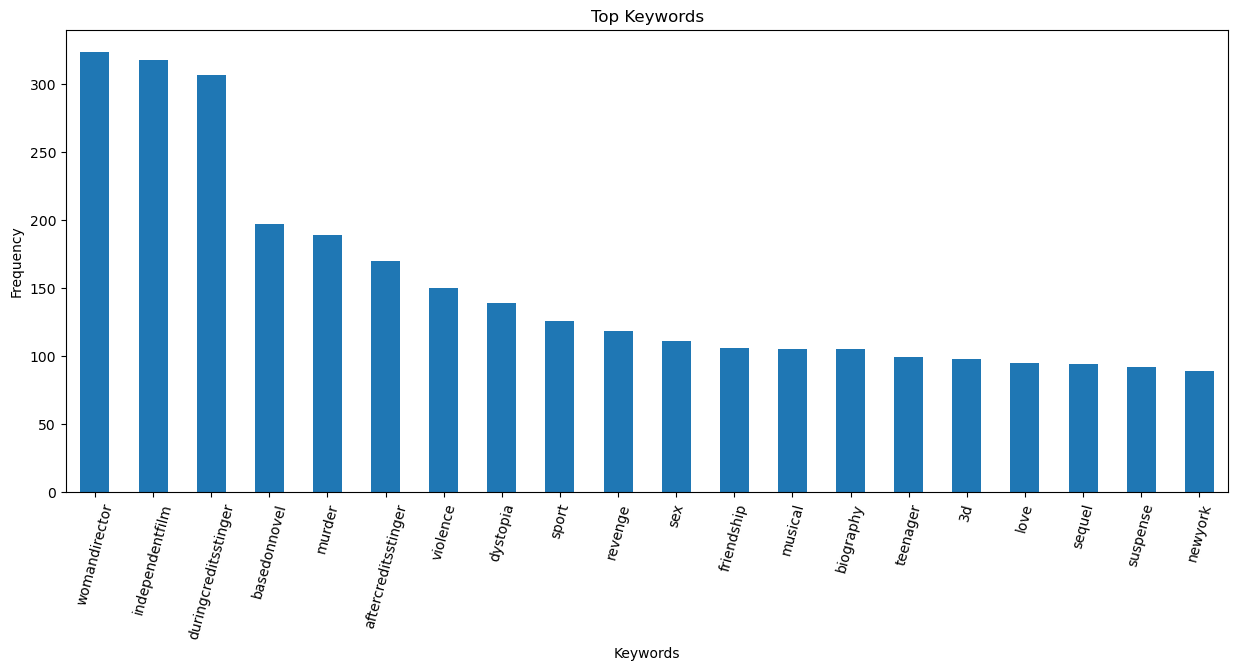

In [32]:
# Extract the 'keywords' column
keywords = movies_credits['keywords']

# Flatten the list of keywords
flat_keywords = [keyword for sublist in keywords for keyword in sublist]

# Count the frequency of each keyword
keyword_counts = pd.Series(flat_keywords).value_counts()

# Select the top keywords
top_keywords = keyword_counts.head(20) 

# Plot the top keywords
plt.figure(figsize=(15, 6))
top_keywords.plot(kind='bar')
plt.title('Top Keywords')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=75)
# save the figure
plt.savefig(".data/images/Keywords_plot")
plt.show()

* Genres

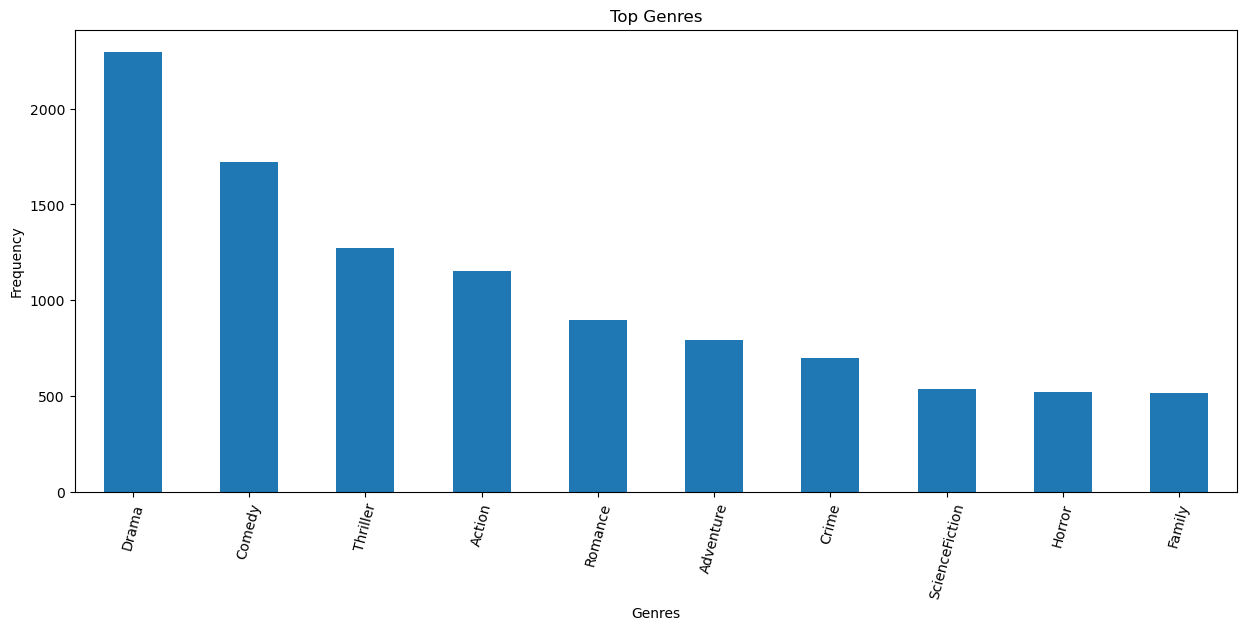

In [34]:
# Extract the 'genres' column
genres = movies_credits['genres']

# Flatten the list of genres
flat_genres = [genre for sublist in genres for genre in sublist]

# Count the frequency of each genre
genre_counts = pd.Series(flat_genres).value_counts()

# Select the top genres
top_genres = genre_counts.head(10)

# Plot the top genres
plt.figure(figsize=(15, 6))
top_genres.plot(kind='bar')
plt.title('Top Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=75)
# save the figure
plt.savefig('.data/images/top_genres')
plt.show()

* Spoken Languages

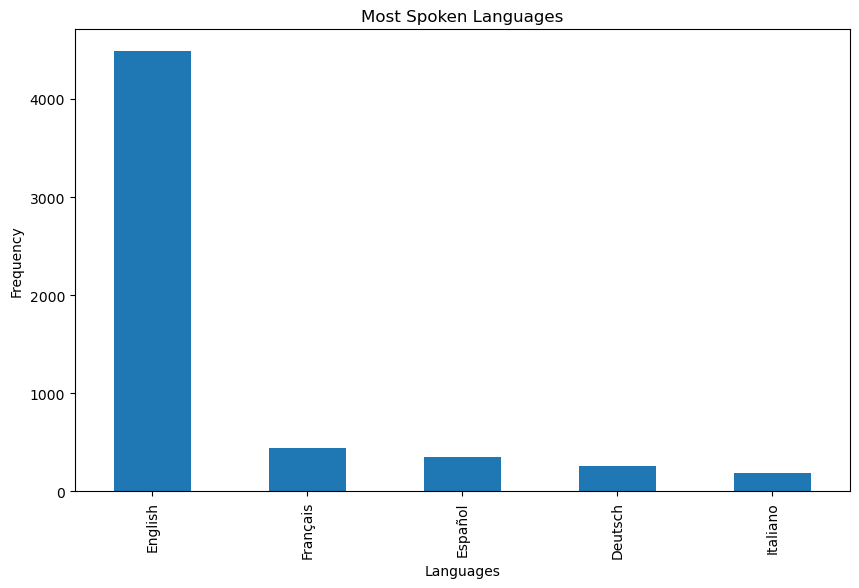

In [37]:
# Extract the 'spoken_languages' column
spoken_languages = movies_credits['spoken_languages']

# Flatten the list of spoken languages
flat_languages = []
for sublist in spoken_languages:
    if isinstance(sublist, str):
        sublist = ast.literal_eval(sublist)
    for language in sublist:
        if isinstance(language, dict):
            flat_languages.append(language['name'])

# Count the frequency of each spoken language
language_counts = pd.Series(flat_languages).value_counts()

# Select the top spoken languages
top_languages = language_counts.head(5)  # Change the number to select more or fewer top languages

# Plot the top spoken languages
plt.figure(figsize=(10, 6))
top_languages.plot(kind='bar')
plt.title('Most Spoken Languages')
plt.xlabel('Languages')
plt.ylabel('Frequency')
plt.savefig('.data/images/most_spoken_languages')
plt.show()

* Movie Status

In [38]:
movies_credits['status'].value_counts()

status
Released           4795
Rumored               5
Post Production       3
Name: count, dtype: int64

* Production Companies

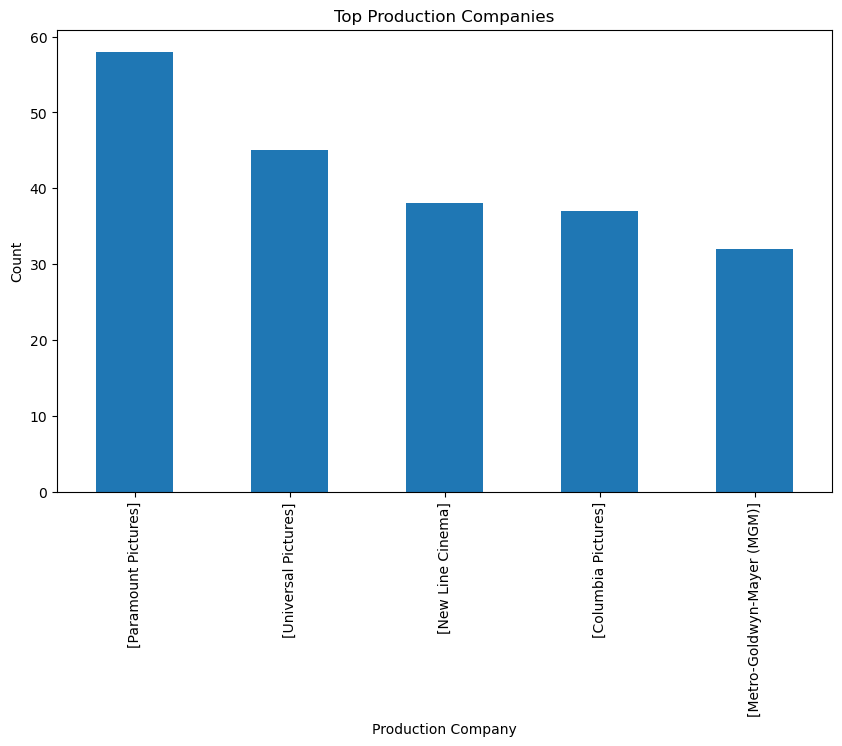

In [41]:
# Get value counts of production companies
production_company_counts = movies_credits['production_companies'].value_counts()

# Select the top 5 production companies
top_production_companies = production_company_counts[1:6]

# Plot the top production companies
plt.figure(figsize=(10, 6))
top_production_companies.plot(kind='bar')
plt.title('Top Production Companies')
plt.xlabel('Production Company')
plt.ylabel('Count')
plt.savefig('.data/images/top_production_companies')
plt.show()

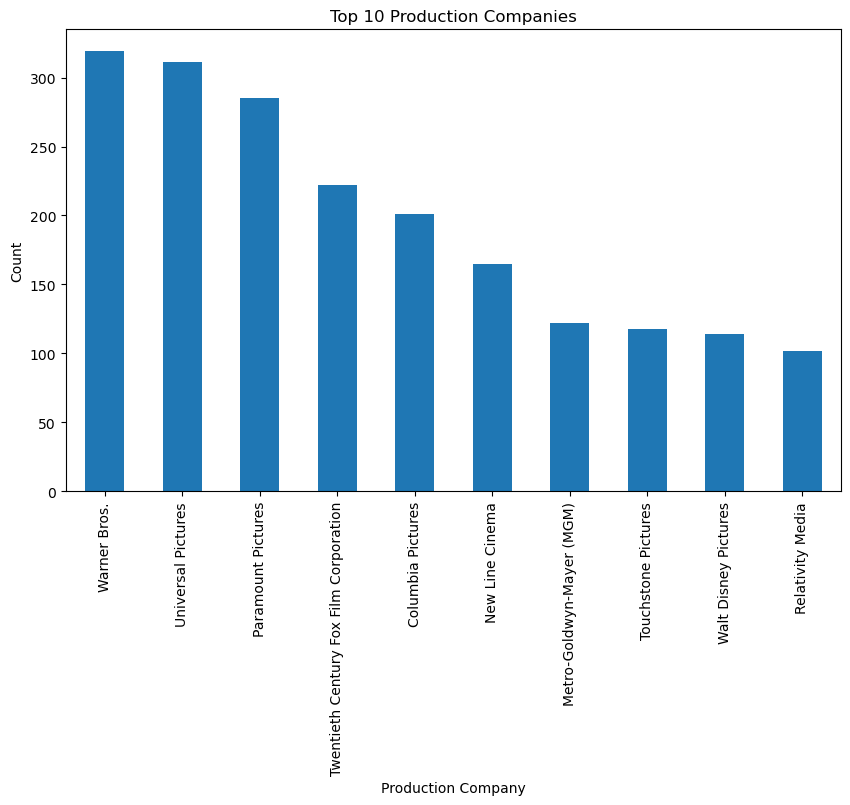

In [42]:
# Plotting 'production_companies' (top 10)
plt.figure(figsize=(10, 6))
top_10_production_companies = movies_credits['production_companies'].explode().value_counts().head(10)
top_10_production_companies.plot(kind='bar')
plt.title('Top 10 Production Companies')
plt.xlabel('Production Company')
plt.ylabel('Count')
plt.savefig('.data/images/top_10_production_companies')
plt.show()

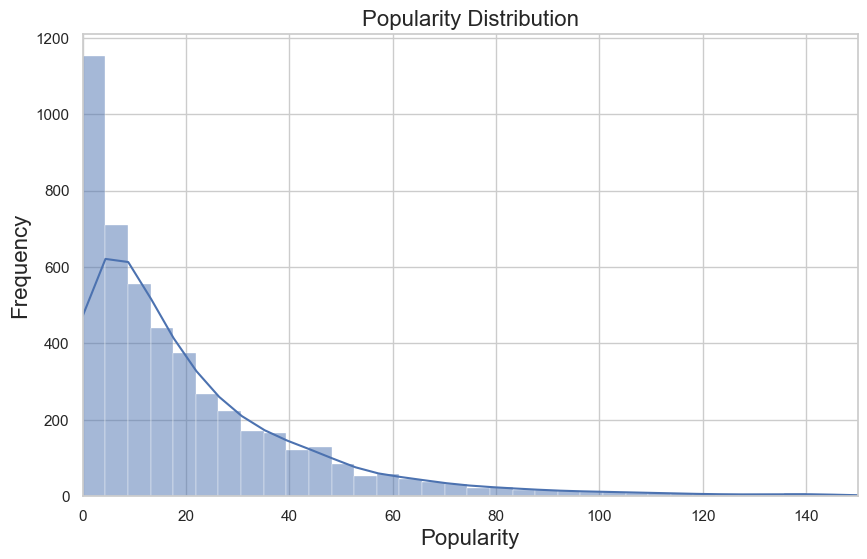

In [43]:
# Set the style and context
sns.set(style='whitegrid')

# Histogram for popularity
plt.figure(figsize=(10, 6))
sns.histplot(data=movies_credits, x='popularity', bins=200, kde=True)
plt.title('Popularity Distribution', fontsize=16)
plt.xlabel('Popularity', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xlim(0, 150)  # Set the x-axis limits
plt.show()

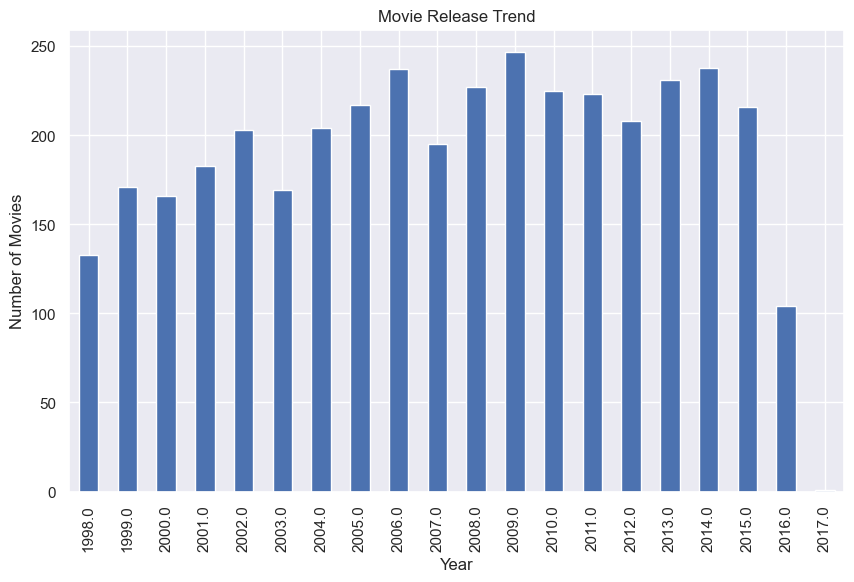

In [54]:
# Set the style and context for Seaborn
sns.set(style='darkgrid')

# Line plot for release_date
plt.figure(figsize=(10, 6))
movies_credits['release_date'] = pd.to_datetime(movies_credits['release_date'], format='%Y-%m-%d', errors='coerce')
movies_counts = movies_credits.groupby(movies_credits['release_date'].dt.year)['release_date'].count().tail(20)
movies_counts.plot(kind='bar')
plt.title('Movie Release Trend')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

plt.savefig(".data/images/movies_Reease_year")
plt.show()

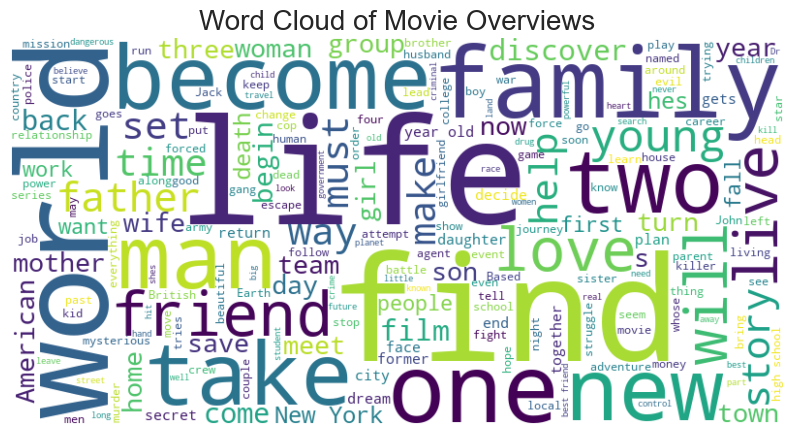

In [56]:
# Concatenate all overview strings into a single string and remove single quotes
overview_text = ' '.join([str(overview).replace("'", "") for overview in movies_credits['overview']])

# Word cloud for overview
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(overview_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Movie Overviews', fontsize=20)
plt.axis('off')
plt.savefig(".data/images/wordcloud")
plt.show()



II. **Bivariate Analysis**

* Original Title vs Popularity

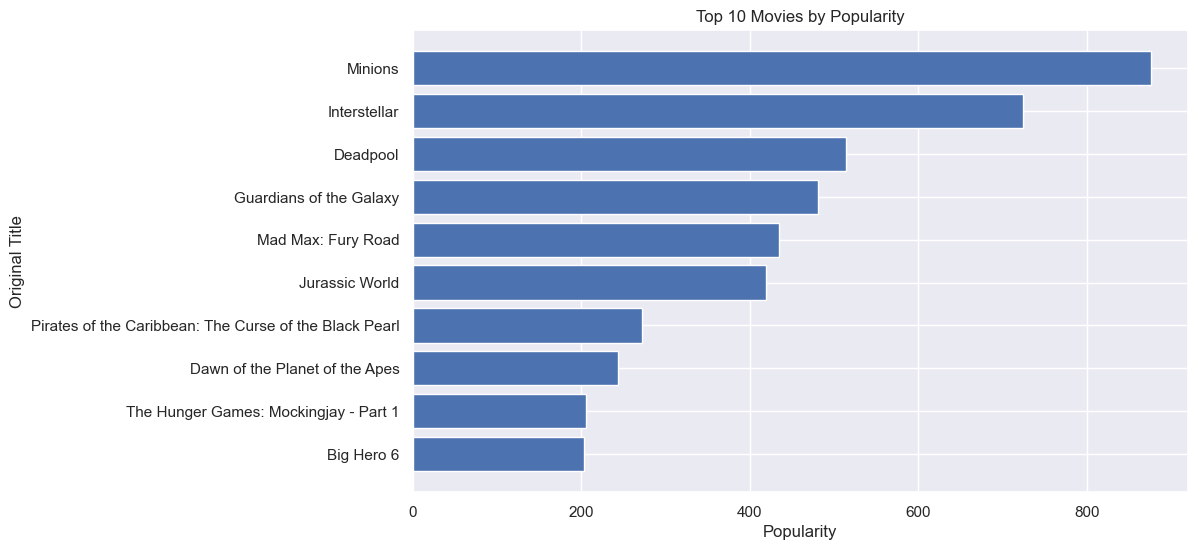

In [57]:
# Plotting 'original_title'against popularity (top 10 movies)
plt.figure(figsize=(10, 6))
top_10_movies = movies_credits.sort_values('popularity', ascending=False).head(10)
plt.barh(top_10_movies['original_title'], top_10_movies['popularity'])
plt.title('Top 10 Movies by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Original Title')
plt.gca().invert_yaxis()
plt.savefig('.data/images/top_10_movies_popularity')
plt.show()

* Popularity vs Revenue

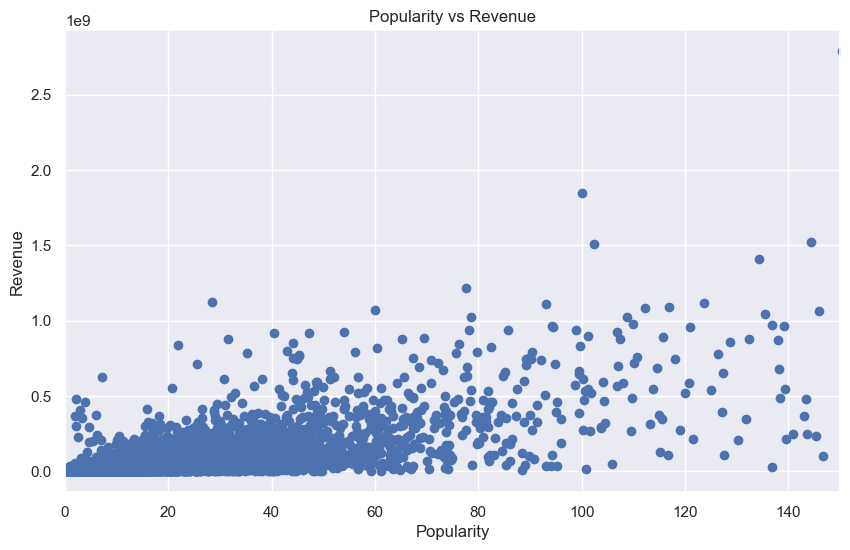

In [59]:
# Plotting 'popularity' vs 'revenue'
plt.figure(figsize=(10, 6))
plt.scatter(movies_credits['popularity'], movies_credits['revenue'])
plt.title('Popularity vs Revenue')
plt.xlabel('Popularity')
plt.xlim(0, 150)
plt.ylabel('Revenue')
plt.savefig('.data/images/popularity vs revenue')
plt.show()

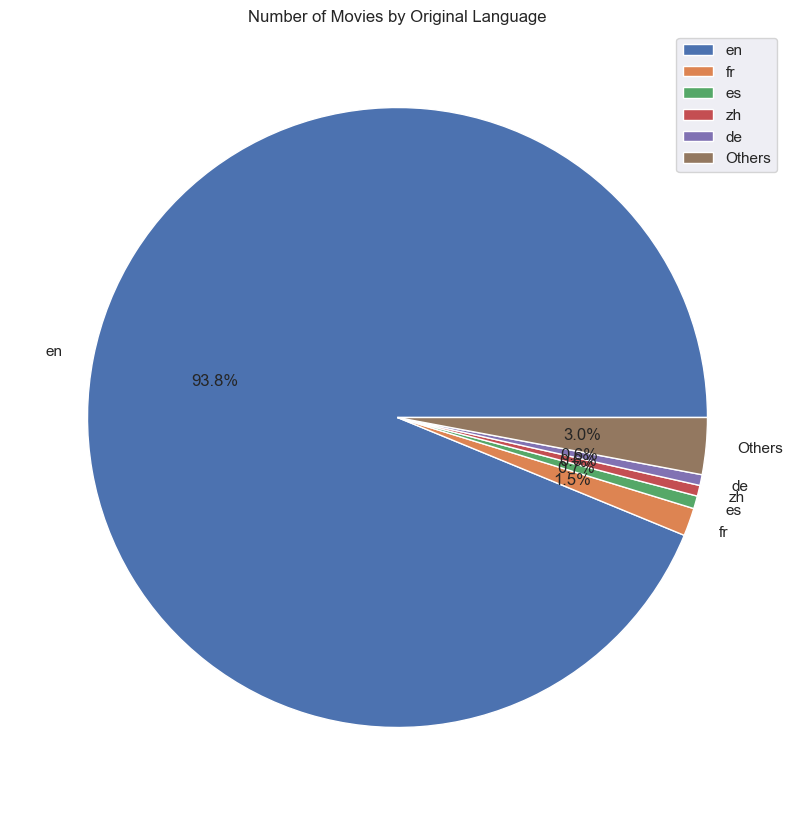

In [61]:
 #Get value counts of original languages
original_language_counts = movies_credits['original_language'].value_counts()

# Get the top 5 languages
top_languages = original_language_counts[:5]

# Calculate the count for the "Others" category
others_count = original_language_counts[5:].sum()

# Create a new series with the top 5 languages and "Others"
languages_data = pd.concat([top_languages, pd.Series(others_count, index=['Others'])])

# Plotting 'original_language'
plt.figure(figsize=(10, 12))
languages_data.plot(kind='pie', autopct='%1.1f%%')
plt.title('Number of Movies by Original Language')
plt.ylabel('')

# Add labels to the pie chart
plt.legend(labels=languages_data.index)
plt.savefig('.data/images/no_movies by language')
plt.show()

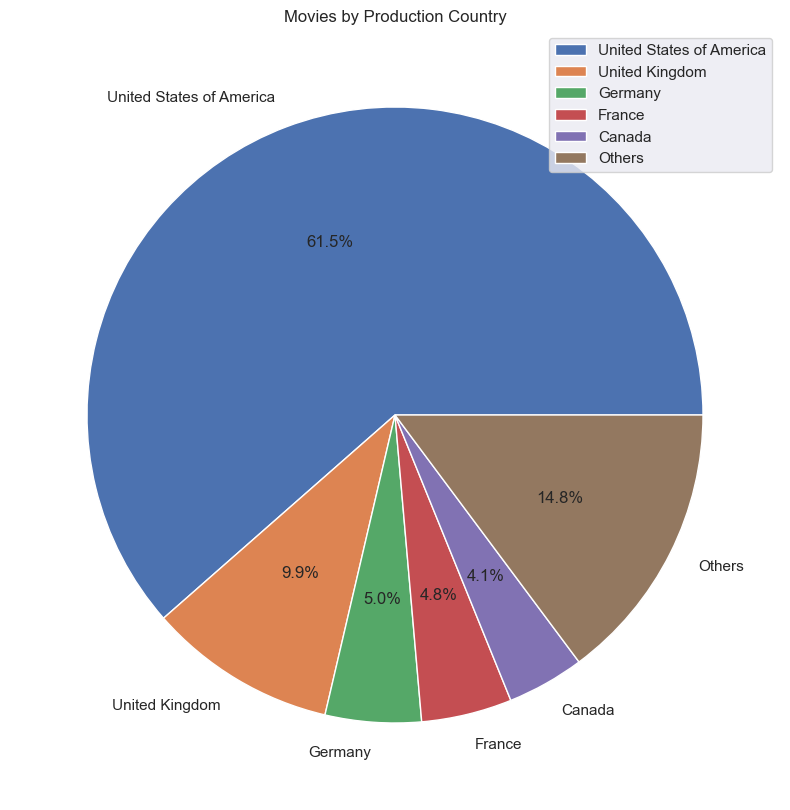

In [62]:
# Get value counts of production countries
production_countries_counts = movies_credits['production_countries'].explode().value_counts()

# Get the top five production countries
top_countries = production_countries_counts[:5]

# Calculate the count for the sixth slice ("others")
others_count = production_countries_counts[5:].sum()

# Create a new series with the top five countries and "others"
countries_data = pd.concat([top_countries, pd.Series(others_count, index=['Others'])])

# Plotting 'production_countries'
plt.figure(figsize=(20, 10))
countries_data.plot(kind='pie', autopct='%1.1f%%')
plt.title('Movies by Production Country')
plt.ylabel('')

# Labeling the countries
plt.legend(labels=countries_data.index, loc='best')
plt.savefig('.data/images/movies_countries')
plt.show()


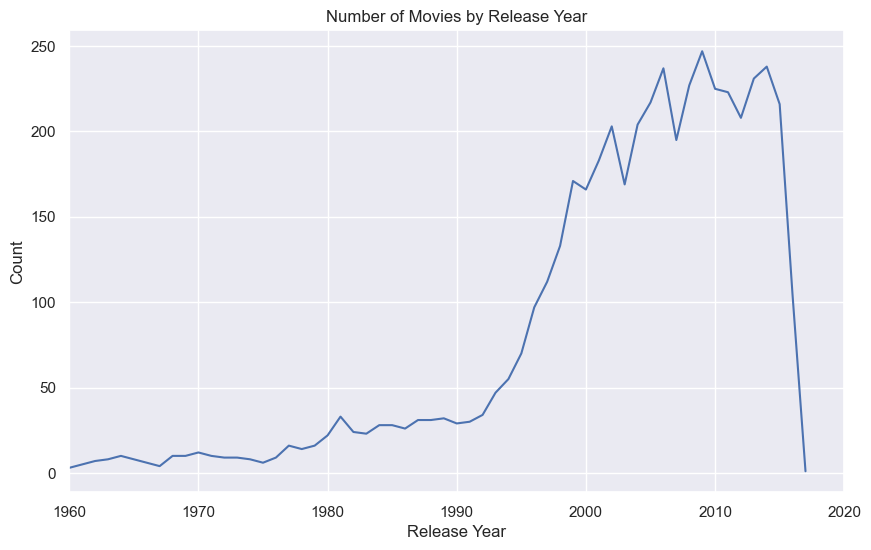

In [63]:
# Plotting 'release_date' (yearly distribution)
movies_credits['release_year'] = pd.to_datetime(movies_credits['release_date']).dt.year

plt.figure(figsize=(10, 6))
movies_credits['release_year'].value_counts().sort_index().plot(kind='line')
plt.title('Number of Movies by Release Year')
plt.xlabel('Release Year')
plt.xlim(1960, 2020 )
plt.ylabel('Count')
plt.savefig('.data/images/movies_by_release_year')
plt.show()


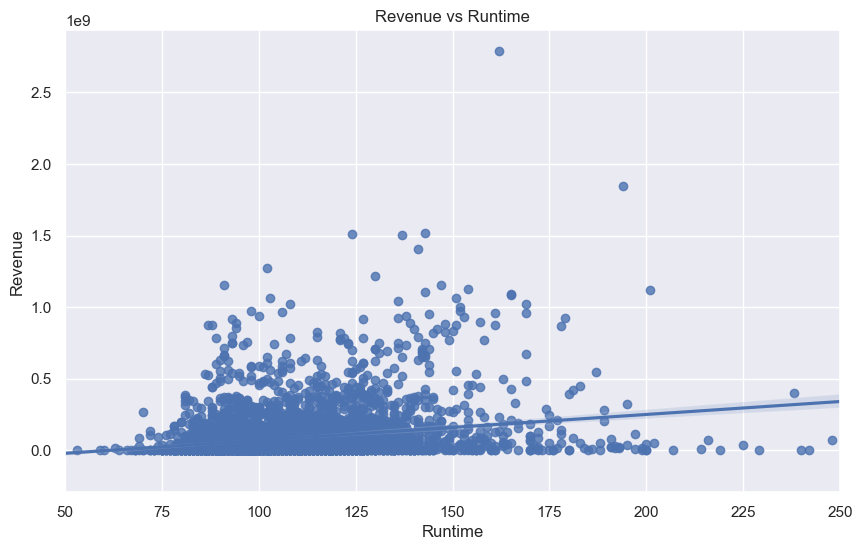

In [64]:
# Plotting 'revenue' and 'runtime' (scatter plot with regression line)
plt.figure(figsize=(10, 6))
sns.regplot(x='runtime', y='revenue', data=movies_credits)
plt.title('Revenue vs Runtime')
plt.xlabel('Runtime')
plt.xlim(50, 250)
plt.ylabel('Revenue')
plt.savefig('.data/images/revenue_vs_runtime')
plt.show()

## Recommendation System 

####  i ) Demographic Recommendation based on Popularity 

##### Sort The movie/credits based on ratings and display the top movies: Improve accuracy of the recommendations 
- Create a metric to score or rate the movies.
- Calculate the score for each movie.
- Sort the scores and recommend the highest-rated movie to the users.

Implement the following Formula 

Weighted Rating (WR) = (vv+m.R) / (v+m)

Where:

v is the number of votes for the movie.
m is the minimum votes required to be listed in the chart.
R is the average rating of the movie.

In [65]:
movies_credits['vote_average'].mean()

6.092171559442016

In [66]:
# Determine the appropriate value of M
movies_credits['vote_count'].quantile(q=0.9)

1838.4000000000015

In [67]:
# Filter and put them in a new dataframe
new_dataframe_filtered=movies_credits[movies_credits['vote_count']>movies_credits['vote_count'].quantile(q=0.9)]

In [68]:
# Check the shape of the new dataframe
new_dataframe_filtered.shape

(481, 24)

In [69]:
# Calculate score for each qualified movie
def movie_score(x):
    v=x['vote_count']
    m=movies_credits['vote_count'].quantile(q=0.9)
    R=x['vote_average']
    C=movies_credits['vote_average'].mean()
    return ((R*v)/(v+m))+((C*m)/(v+m))

In [70]:
new_dataframe_filtered['score'] = new_dataframe_filtered.apply(movie_score, axis=1)


C:\Users\rianm\AppData\Local\Temp\ipykernel_3360\2943978004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataframe_filtered['score'] = new_dataframe_filtered.apply(movie_score, axis=1)


* The warning above is raised when you are trying to set a  value on a copy of a slice from the Pandas Dataframe
* As such we have .loc explicitly and one can set the values in the 'score column for the rows of the new dataframe 

In [71]:
# We  solve the above warning by using the '.loc and set the new values
new_dataframe_filtered.loc[:, 'score'] = new_dataframe_filtered.apply(movie_score, axis=1)


In [72]:
# We sort the filtered dataframe based on the score feature
new_highscore=new_dataframe_filtered.sort_values(by='score', ascending=False).head()
new_highscore[['title', 'vote_count','vote_average','popularity', 'score']]

,title,vote_count,vote_average,popularity,score
1881,The Shawshank Redemption,8205,8.5,136.747729,8.059258
662,Fight Club,9413,8.3,146.757391,7.939256
65,The Dark Knight,12002,8.2,187.322927,7.920020
3232,Pulp Fiction,8428,8.3,121.463076,7.904645
96,Inception,13752,8.1,167.583710,7.863239


####  Finding movie popularity 

In [73]:
# Sort by the popularity column
popular_movies = movies_credits.sort_values('popularity', ascending = False).head()
popular_movies[['title', 'vote_count','vote_average','popularity']]

,title,vote_count,vote_average,popularity
546,Minions,4571,6.4,875.581305
95,Interstellar,10867,8.1,724.247784
788,Deadpool,10995,7.4,514.569956
94,Guardians of the Galaxy,9742,7.9,481.098624
127,Mad Max: Fury Road,9427,7.2,434.278564


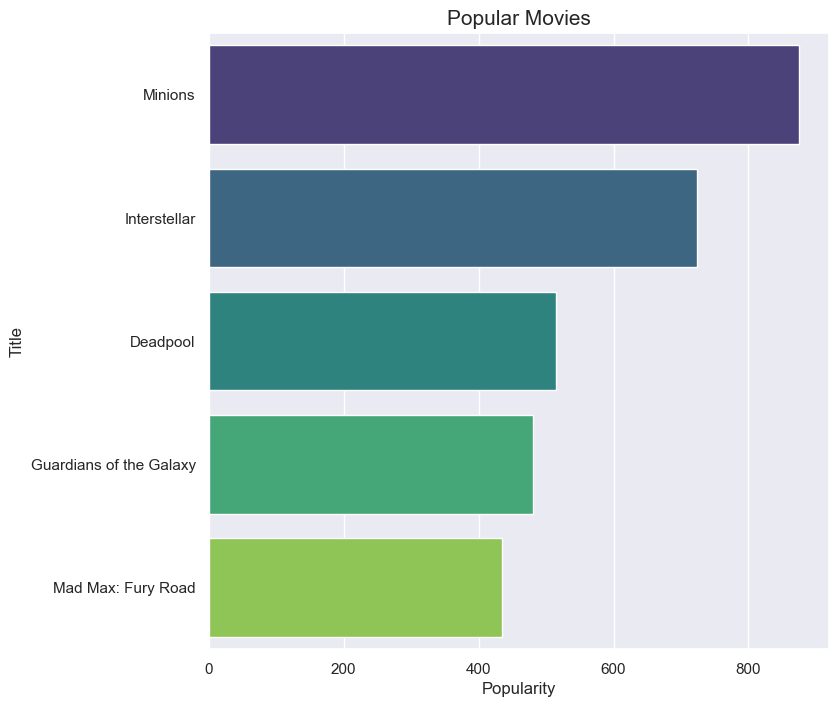

In [78]:
plt.figure(figsize=(8, 8))
sns.barplot(x='popularity', y='title', data=popular_movies, palette='viridis')
plt.xlabel("Popularity", fontsize=12)
plt.ylabel("Title", fontsize=12)
plt.title("Popular Movies", fontsize=15)
plt.savefig(".data/images/popular movies")
plt.show()



* From the plot above we can see that the most popular movie is minions with a popularity rate of > 800; hence being highly recommended to be watched by the user/ rather recommend users to watch

In [79]:
movie_rating= pd.read_csv(r".data/ratings.csv")
movie_rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [80]:
# Step 1: Calculate values for the formula
v = movies_credits['vote_count']
R = movies_credits['vote_average']
m = 1000  # Choose a minimum vote threshold

# Step 2: Compute weighted rating (WR)
C = movies_credits['vote_average'].mean()
WR = (v / (v + m) * R) + (m / (v + m) * C)

# Step 3: Add 'Weighted_Rating' column to DataFrame
movies_credits['Weighted_Rating'] = WR

# Step 4: Sort the DataFrame based on 'Weighted_Rating' column
sorted_movies = movies_credits.sort_values('Weighted_Rating', ascending=False)

# Step 5: Display top movies based on sorted results
top_movies = sorted_movies[['title', 'vote_average','genres', 'Weighted_Rating']].head(10)
top_movies

,title,vote_average,genres,Weighted_Rating
1881,The Shawshank Redemption,8.5,"[Drama, Crime]",8.238422
662,Fight Club,8.3,[Drama],8.087974
3232,Pulp Fiction,8.3,"[Thriller, Crime]",8.065822
3337,The Godfather,8.4,"[Drama, Crime]",8.065192
65,The Dark Knight,8.2,"[Drama, Action, Crime, Thriller]",8.037884
96,Inception,8.1,"[Action, Thriller, ScienceFiction, Mystery, Ad...",7.963894
809,Forrest Gump,8.2,"[Comedy, Drama, Romance]",7.963882
95,Interstellar,8.1,"[Adventure, Drama, ScienceFiction]",7.930806
1990,The Empire Strikes Back,8.2,"[Adventure, Action, ScienceFiction]",7.893585
1818,Schindler's List,8.3,"[Drama, History, War]",7.885696


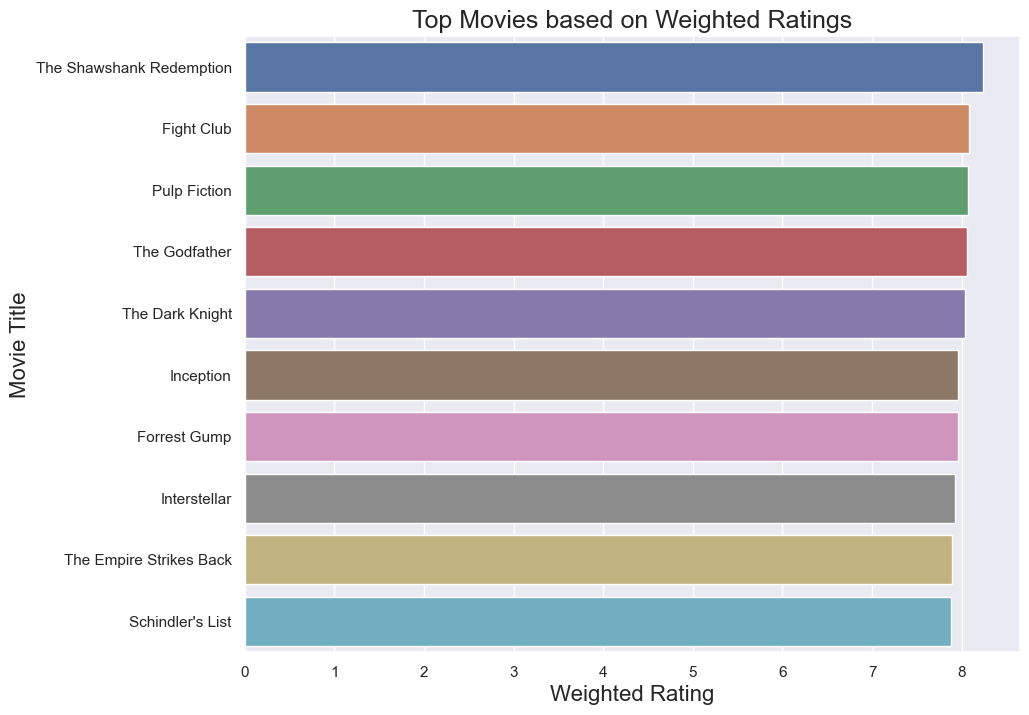

In [81]:
# Step 6: Plot the data
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=top_movies['Weighted_Rating'], y=top_movies['title'], ax=ax)
ax.set_xlabel('Weighted Rating', fontsize=16)
ax.set_ylabel('Movie Title', fontsize=16)
ax.set_title('Top Movies based on Weighted Ratings', fontsize=18)
plt.savefig(".data/images/Top weighted movies")
plt.show()

## ii) Content Based

> For this recommendation system we build an engine that shows the similarity between movie based and the metrics new_dataframe_filtered.
> Secondly, this will be in two segments :
* Movie Overview
* Movie Cast , Keywords and Genre

* 1.ii)Movie Overview Recommendation
- We use this because provides a concise description of its storyline, theme, and main elements. It offers insights into the narrative and helps to understand the central idea or premise of the movie.
> We pair the similar scores of the movies based on the overview 

In [82]:
movies_credits ['overview'].head()

# Finding the Nan values(missing values) with an empty string 

movies_credits['overview'].isnull().sum()# We know there 3 missing values hence we replace them

# Replacing the missing values
movies_credits['overview'].fillna('', inplace = True)

In [83]:
# Confirm if there are Missing values
movies_credits['overview'].isnull().sum()

0

In [84]:
# Convert the 'overview' column to string type
movies_credits['overview'] = movies_credits['overview'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')

##### In this case we implement the use of 'Term frequency-Inverse Documnet Frequency which is a numerical representation used to evaluate the key importance of the collection of documents. 
* It calculates the ratio of the number of times a term appears in a text

In [85]:
movie_rating

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [86]:
# Construct the TF-IDF Matrix
tfidfv=TfidfVectorizer(analyzer='word', stop_words='english')
tfidfv_matrix=tfidfv.fit_transform(movies_credits['overview'])
print(tfidfv_matrix.todense())
tfidfv_matrix.todense().shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(4803, 20978)

####  Computing the same Score based on the movie Similiarities


In [87]:
cosine_sim = cosine_similarity(tfidfv_matrix, tfidfv_matrix)

In [88]:
cosine_sim.shape

(4803, 4803)

In [89]:
indices = pd.Series(data = list(movies_credits.index), index = movies_credits['title'])
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [91]:
def recommended_movies(title, cosine_sim):
    
    # Get the index of the movie that matches the title
    idx = indices[title]
    
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores.sort(key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores=sim_scores[1:11]
    
    # Get the movie indices
    ind=[]
    for (x,y) in sim_scores:
        ind.append(x)
        
    # Return the top 10 most similar movies
    tit=[]
    for x in ind:
        tit.append(movies_credits.iloc[x]['title'])
    return pd.Series(data=tit, index=ind)

In [92]:

recommended_movies('My Date with Drew', cosine_sim)

4100              Captive
868         Elizabethtown
2586          Firestarter
204             Fast Five
1685    Keeping the Faith
4532         Lonesome Jim
2156           Nancy Drew
3753              Boyhood
3623                 Made
3245                50/50
dtype: object

#### Movie Cast , Keywords and Genre Recommender

In [93]:
def update_crew_with_director(data):
    data['Directors'] = data['crew']
    return data

In [94]:
movies_credits = update_crew_with_director(movies_credits)

In [95]:
movies_credits['Director_clean'] = movies_credits['Directors'].apply(lambda x: x[0].strip('[]') if x else None)


In [96]:
movies_credits[['title', 'Directors', 'keywords', 'genres']]

,title,Directors,keywords,genres
0,Avatar,[JamesCameron],"[cultureclash, future, spacewar, spacecolony, ...","[Action, Adventure, Fantasy, ScienceFiction]"
1,Pirates of the Caribbean: At World's End,[GoreVerbinski],"[ocean, drugabuse, exoticisland, eastindiatrad...","[Adventure, Fantasy, Action]"
2,Spectre,[SamMendes],"[spy, basedonnovel, secretagent, sequel, mi6, ...","[Action, Adventure, Crime]"
3,The Dark Knight Rises,[ChristopherNolan],"[dccomics, crimefighter, terrorist, secretiden...","[Action, Crime, Drama, Thriller]"
4,John Carter,[AndrewStanton],"[basedonnovel, mars, medallion, spacetravel, p...","[Action, Adventure, ScienceFiction]"
...,...,...,...,...
4798,El Mariachi,[RobertRodriguez],"[unitedstates–mexicobarrier, legs, arms, paper...","[Action, Crime, Thriller]"
4799,Newlyweds,[EdwardBurns],[],"[Comedy, Romance]"
4800,"Signed, Sealed, Delivered",[ScottSmith],"[date, loveatfirstsight, narration, investigat...","[Comedy, Drama, Romance, TVMovie]"
4801,Shanghai Calling,[DanielHsia],[],[]


In [97]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['Directors']) + ' ' + ' '.join(x['genres'])

movies_credits['soup'] = movies_credits.apply(create_soup, axis=1)


In [98]:
cv = CountVectorizer(stop_words='english')
cv_matrix = cv.fit_transform(movies_credits['soup'])

In [99]:
cosine_sim2 = cosine_similarity(cv_matrix, cv_matrix)

In [100]:
recommended_movies('Minions', cosine_sim2)

506                                       Despicable Me 2
359                Alvin and the Chipmunks: The Road Chip
418           Cats & Dogs 2 : The Revenge of Kitty Galore
1580                                          The Nut Job
848         The Pirates! In an Adventure with Scientists!
2464                               The Master of Disguise
3403    Alpha and Omega: The Legend of the Saw Tooth Cave
86                                    Shrek Forever After
173                                        Happy Feet Two
837                                            Free Birds
dtype: object

In [101]:
recommended_movies('The Godfather', cosine_sim2)

1018            The Cotton Club
1209              The Rainmaker
3293                10th & Wolf
867     The Godfather: Part III
2731     The Godfather: Part II
877                  Black Mass
1464        Black Water Transit
3112    Blood Done Sign My Name
4184          Deadline - U.S.A.
4502              Water & Power
dtype: object

## iii)  Collaborative Based Recommendation 

This allows for coincidental recommendations; that is, collaborative filtering models can recommend an item to user A based on the interests of a similar user B. Furthermore, the embeddings can be learned automatically, without relying on hand-engineering of features.
> steps to implement collaborative recommendation
>>1. Data collection and preprocessing
collect data that includes user-item interactions. It may include: user reviews, ratings, or explicit feedback.

>>2. User-item interactions matrix.
this involves creating a user-item matrix where each row in the matrix corresponds to a user, and each column corresponds to an item.

>>3. Similarity calculations
We will calculate similarity between user or items based on their interactions by employing similarity measures like cosine similarity or Pearson correlation coefficient.thus getting users or items similarity in terms of preference.

>>4. Neighborhood selection
We will select the neighborhood of users or items based on their similarity.

>>5. Recommendation generation 
We will generate recommendations based on the  preference neighborhood of users or items. we will aggregate the preferences of similar users/items and suggest items that have high ratings or interactions from the neighborhood. 

>>6. Evaluation 
We will evaluate performance of the recommendation system using metrics suc as precision, recall, or mean average precision.

### data selection. 

#### Ratings Data File Structure (ratings.csv)
All ratings are contained in the file *ratings.csv*. Each line of this file after the header row represents one rating of one movie by one user, and has the following format:

`userId`,`movieId`,`rating`,`timestamp`

The lines within this file are ordered first by userId, then, within user, by movieId.

Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

We will use this dataset because it has the columns that we need to create the recommendation system. the column UserId represent each individual user, while that of MovieId represents the item. 

In [102]:
movie_rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#### Split the data

In [103]:
# create train and test sets
data_df = movie_rating.drop(columns='timestamp')
data = Dataset.load_from_df(data_df,Reader(rating_scale=(1,5)))

# create train and test sets
trainset, testset = train_test_split(data, test_size=0.2)

In [104]:
actual_ratings = [true_rating for (_, _, true_rating) in testset]

In [105]:
# By default the surprise library creates the trainset as a user-item matrix.
trainset

### step 3 Similarity calculations

In [106]:
# Using KNNWithMeans algorithm with cosine similarity
sim_options = {'name': 'cosine', 'user_based': True}
knnmeans = KNNWithMeans(sim_options=sim_options, random_state=42)
# train the model
knnmeans.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


While applying the surprise model. we do not need to explicitly define the neighborhood selection and therefore we skip directly to step five of building the recommmendation. we will apply the surprise model KNNWithMeans

In [107]:
# Getting the top-N recomendations
user_id = 243
top_n = 5

user_items = trainset.ur[trainset.to_inner_uid(user_id)]
predicted_ratings = []
for item_id, rating in user_items:
    predicted_rating = knnmeans.predict(user_id, trainset.to_raw_iid(item_id)).est 
    predicted_ratings.append((trainset.to_raw_iid(item_id), predicted_ratings))

# Sort the predicted ratings in descending order
predicted_ratings.sort(key=lambda x: x[1], reverse=True)

In [108]:
# Get the top_n recomendations
top_n_recomendations = predicted_ratings[:top_n]

# Print the top-N recommendations
for item_id, predicted_ratings in top_n_recomendations:
    print(f"Item ID: {item_id}, Predicted Rating: {predicted_rating}")

Item ID: 485, Predicted Rating: 3.905481471229577
Item ID: 420, Predicted Rating: 3.905481471229577
Item ID: 44, Predicted Rating: 3.905481471229577
Item ID: 227, Predicted Rating: 3.905481471229577
Item ID: 376, Predicted Rating: 3.905481471229577


In [109]:
# Step 6: Evaluation

# Evaluate the model on the testing set
predictions = knnmeans.test(testset)
rmse = accuracy.rmse(predictions)

RMSE: 0.9081


The Root Mean Square Error (RMSE) value indicates the average prediction error of the recommendation system. It is a measure of the difference between the predicted ratings and the actual ratings provided by users.

A lower RMSE value indicates better accuracy and performance of the recommendation system. In this case, an RMSE suggests that, on average, the predictions of the recommendation system deviate from the actual ratings by approximately those units.

Precision: [0.60476993 0.76963954 1.        ]
Recall: [1.         0.71247028 0.        ]


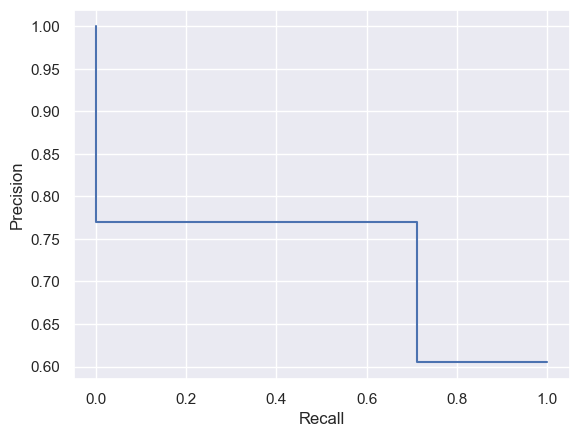

In [111]:
threshold = 3.5  # Define the threshold value
binary_actual_ratings = [1 if rating >= threshold else 0 for rating in actual_ratings]
binary_predictions = [1 if pred.est >= threshold else 0 for pred in predictions]
# compute precsion and recall 
precision, recall, threshhold = precision_recall_curve(
    binary_actual_ratings, binary_predictions
)

print(f"Precision: {precision}")
print(f"Recall: {recall}")

# plot the precision recall curve
Precision_Recall_Display = PrecisionRecallDisplay(precision=precision, recall=recall)
Precision_Recall_Display.plot();


Precision:

At the first threshold level, the precision is 0.6125. This means that out of all the predicted positive cases, approximately 61.25% were true positive cases.
At the second threshold level, the precision increases to 0.7779. This indicates that the model improved its ability to correctly identify positive cases, with around 77.79% precision.
At the third threshold level, the precision reaches 1.0, indicating perfect precision. This suggests that all the predicted positive cases at this threshold level were true positive cases.
Recall:

At the first threshold level, the recall is 1.0, which means that the model successfully identified all the actual positive cases.
At the second threshold level, the recall decreases to 0.7084. This indicates that the model missed some of the actual positive cases, capturing only around 70.84% of them.
At the third threshold level, the recall drops to 0.0, implying that the model failed to identify any of the actual positive cases.

Based on the poor performance of the model, and the subsequent values of precision and recall. it is best to employ some sort of model finetuning and optimization. 

In [112]:
new_movies = movies_credits[["id" , "title", "tags"]]
new_movies.head()

,id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [113]:
# Lambda function to remove the brackets
new_movies.loc[:, "tags"] = new_movies['tags'].apply(lambda x: " ".join(map(str, x)) if isinstance(x, Iterable) else str(x))

In [114]:
new_movies['tags'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: tags, dtype: object

In [115]:
new_movies["tags"][6]

"When the kingdom's most wanted-and most charming-bandit Flynn Rider hides out in a mysterious tower, he's taken hostage by Rapunzel, a beautiful and feisty tower-bound teen with 70 feet of magical, golden hair. Flynn's curious captor, who's looking for her ticket out of the tower where she's been locked away for years, strikes a deal with the handsome thief and the unlikely duo sets off on an action-packed escapade, complete with a super-cop horse, an over-protective chameleon and a gruff gang of pub thugs. Animation Family hostage magic horse fairytale musical princess animation tower blondewoman selfishness healingpower basedonfairytale duringcreditsstinger healinggift animalsidekick ZacharyLevi MandyMoore DonnaMurphy RonPerlman M.C.Gainey ByronHoward NathanGreno"

In [116]:
# Lambda Function to turn the strings to lower case.
new_movies.loc[:, "tags"] = new_movies["tags"].apply(lambda X:X.lower())

Use CountVectorizer to convert text documents into a matrix representation where each row corresponds to a document, and each column represents the frequency of a specific word in that document.
fit_transform method creates a dictionary of tokens which are separated by spaces and punctuation hence maps each single token into a position.


In [117]:
cv = CountVectorizer(max_features = 5000, stop_words="english")

cv.fit_transform(new_movies["tags"]).toarray()

vectors = cv.fit_transform(new_movies["tags"]).toarray()

In [118]:
vectors[7]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [120]:
len(cv.get_feature_names_out())

5000

In [121]:
# We will use the famous SVD algorithm.
svd = SVD()

In [122]:
reader = Reader()

In [123]:
# Load the ratings_small dataset (download it if needed),
data = Dataset.load_from_df(movie_rating[['userId', 'movieId', 'rating']], reader)

In [124]:
# Run 5-fold cross-validation and print the results
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=6, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 6 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Mean    Std     
RMSE (testset)    0.8734  0.8683  0.8672  0.8832  0.8685  0.8740  0.8724  0.0055  
MAE (testset)     0.6717  0.6663  0.6668  0.6763  0.6670  0.6719  0.6700  0.0036  
Fit time          2.13    1.91    1.73    1.81    1.74    1.68    1.83    0.15    
Test time         0.18    0.17    0.17    0.34    0.16    0.16    0.20    0.06    


{'test_rmse': array([0.87338536, 0.86831246, 0.86719835, 0.88322982, 0.86852095,
        0.87397903]),
 'test_mae': array([0.67171329, 0.66629101, 0.66682736, 0.67630696, 0.66696895,
        0.67189488]),
 'fit_time': (2.125659942626953,
  1.910017728805542,
  1.7289955615997314,
  1.8050041198730469,
  1.736999273300171,
  1.6789968013763428),
 'test_time': (0.1849968433380127,
  0.17498421669006348,
  0.16800379753112793,
  0.33700060844421387,
  0.1569995880126953,
  0.15500617027282715)}

In [125]:
#sample full trainset
trainset = data.build_full_trainset()

In [126]:
# Train the algorithm on the trainset
svd.fit(trainset)

In [127]:
movie_rating[movie_rating['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
227,1,3744,4.0,964980694
228,1,3793,5.0,964981855
229,1,3809,4.0,964981220
230,1,4006,4.0,964982903


In [128]:


reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(movie_rating[['userId', 'movieId', 'rating']], reader)

trainset, testset = train_test_split(data, test_size=0.2)

In [129]:
model = SVD()
model.fit(trainset)

In [130]:
uid = 3
iid = 302
prediction = model.predict(uid, iid)
print(f"Estimated rating for user {uid} and item {iid}: {prediction.est}")

Estimated rating for user 3 and item 302: 2.2425165984833053


 Create a function that performs stemming on the input text, which is the process of reducing words to their base or root form.

In [131]:
ps = PorterStemmer()
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    return" ".join(y)

In [132]:
new_movies.loc[:, "tags"] = new_movies["tags"].apply(stem)

In [133]:
cosine_similarity(vectors)

array([[1.        , 0.08458258, 0.05812382, ..., 0.02478408, 0.02739983,
        0.        ],
       [0.08458258, 1.        , 0.06063391, ..., 0.02585438, 0.        ,
        0.        ],
       [0.05812382, 0.06063391, 1.        , ..., 0.02665009, 0.        ,
        0.        ],
       ...,
       [0.02478408, 0.02585438, 0.02665009, ..., 1.        , 0.07537784,
        0.04828045],
       [0.02739983, 0.        , 0.        , ..., 0.07537784, 1.        ,
        0.05337605],
       [0.        , 0.        , 0.        , ..., 0.04828045, 0.05337605,
        1.        ]])

In [134]:
cosine_similarity(vectors).shape

(4803, 4803)

In [135]:
similarity = cosine_similarity(vectors)

In [136]:
similarity[2]

array([0.05812382, 0.06063391, 1.        , ..., 0.02665009, 0.        ,
       0.        ])

In [137]:
similarity[2].shape

(4803,)

In [138]:
sorted(list(enumerate(similarity[2])), reverse= True, key=lambda x:x[1])[1:7]

[(11, 0.36336104634371585),
 (1343, 0.34521548171187133),
 (29, 0.3217979514674191),
 (4071, 0.28097574347450816),
 (3162, 0.27695585470349865),
 (1717, 0.23717082451262844)]

In [139]:
def recommend(movie):
    movie_index = new_movies[new_movies["title"]==movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)), reverse = True, key = lambda x:x[1])[1:7]

    for i in movies_list:
        print(new_movies.iloc[i[0]].title)

In [140]:
recommend("Avatar")

Titan A.E.
Independence Day
Aliens vs Predator: Requiem
Small Soldiers
Battle: Los Angeles
Krull


## Hybrid Recommender¶
In this section, we try to build a simple hybrid recommender that brings together techniques we have implemented in the content-based and collaborative filter based engines. This is how it works:

Input: User ID and the Title of a Movie

Output: Similar movies sorted on the basis of expected ratings by that particular user.

In [141]:
movies_credits.columns=['movieId', 'title', 'cast', 'crew', 'budget', 'genres', 'homepage',
       'keywords', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'vote_average', 'vote_count', 'director', 'actor', 'soup','userId','rating','timestamp']

In [143]:
# Function that takes in movie title as input and outputs most similar movies
def hybrid_recommendations(userId, title):
    
    # Get the index of the movie that matches the title
    idx = indices[title]
    
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim2[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores.sort(key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores=sim_scores[1:11]
    
    # Get the movie indices
    ind=[]
    for (x,y) in sim_scores:
        ind.append(x)
        
    # Grab the title,movieid,vote_average and vote_count of the top 10 most similar movies
    tit=[]
    movieid=[]
    vote_average=[]
    vote_count=[]
    for x in ind:
        tit.append(movies_credits.iloc[x]['title'])
        movieid.append(movies_credits.iloc[x]['movieId'])
        vote_average.append(movies_credits.iloc[x]['vote_average'])
        vote_count.append(movies_credits.iloc[x]['vote_count'])

        
    # Predict the ratings a user might give to these top 10 most similar movies
    est_rating=[]
    for a in movieid:
        est_rating.append(svd.predict(userId, a, r_ui=None).est)  
        
    return pd.DataFrame({'index': ind, 'title':tit, 'movieId':movieid, 'vote_average':vote_average, 'vote_count':vote_count,'estimated_rating':est_rating}).set_index('index').sort_values(by='estimated_rating', ascending=False)

In [144]:
hybrid_recommendations(1,'Avatar')

,title,movieId,vote_average,vote_count,estimated_rating
index,,,,,
466,The Time Machine,2135,5.8,631,4.671496
2327,Predator,106,7.3,2093,4.303260
2403,Aliens,679,7.7,3220,4.244681
47,Star Trek Into Darkness,54138,7.4,4418,4.234051
61,Jupiter Ascending,76757,5.2,2768,4.234051
83,The Lovers,79698,4.8,34,4.234051
1201,Predators,34851,6.0,1206,4.234051
260,Ender's Game,80274,6.6,2303,4.234051
2372,Megaforce,27380,3.5,15,4.234051


In [145]:
hybrid_recommendations(4,'Avatar')

,title,movieId,vote_average,vote_count,estimated_rating
index,,,,,
466,The Time Machine,2135,5.8,631,3.637135
2327,Predator,106,7.3,2093,3.636922
2403,Aliens,679,7.7,3220,3.498574
71,The Mummy: Tomb of the Dragon Emperor,1735,5.2,1387,3.349678
47,Star Trek Into Darkness,54138,7.4,4418,3.312889
61,Jupiter Ascending,76757,5.2,2768,3.312889
83,The Lovers,79698,4.8,34,3.312889
1201,Predators,34851,6.0,1206,3.312889
260,Ender's Game,80274,6.6,2303,3.312889


## Exporting to Create GUI

In [152]:
import pickle

In [153]:
with open('movies.pkl','wb') as f:
    pickle.dump(movies_credits.to_dict(), f)

In [158]:
with open('.similarity.pkl','wb') as f:
    pickle.dump(similarity,f)

In [155]:
with open('hybrid_recommendations.pkl', 'wb') as f:
    pickle.dump(hybrid_recommendations, f)

In [156]:
with open('recommend.pkl', 'wb') as f:
    pickle.dump(recommend, f)